<a href="https://colab.research.google.com/github/harikiran-mudipalli/Microsoft_Malware_Detection/blob/master/msmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install kaggle
x=[]
while True:
  x.append(1)

In [5]:
# upload the credentials of kaggle account

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harikiranm","key":"7b6663d9a65d638a921dd4bea72806da"}'}

In [0]:
# before importing the code, run below code
# the kaggle API client expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# this permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# import the dataset
!kaggle competitions download -c microsoft-malware-prediction

100% 134M/134M [00:01<00:00, 92.4MB/s]
100% 134M/134M [00:01<00:00, 107MB/s] 
 98% 658M/672M [00:05<00:00, 111MB/s]
100% 672M/672M [00:05<00:00, 137MB/s]
100% 768M/768M [00:05<00:00, 140MB/s]



In [0]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


# Extraction and Importing Data


In [8]:
#for extracting Zip files
from zipfile import ZipFile
file_name='train.csv.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('train data extracted')

from zipfile import ZipFile
file_name='test.csv.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('test data extracted')

train data extracted
test data extracted


In [0]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
%time train = pd.read_csv('train.csv',dtype=dtypes)
%time test = pd.read_csv('test.csv',dtype=dtypes)

CPU times: user 2min 49s, sys: 9.15 s, total: 2min 58s
Wall time: 2min 58s
CPU times: user 2min 28s, sys: 2.92 s, total: 2min 31s
Wall time: 2min 31s


# Analysing Data

## Train set



In [0]:
train_copy = train.copy(deep = True)

In [0]:

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [0]:
train_copy.head(5)

MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  AVProductsInstalled  \
0                        NaN                    53447.0                  1.0   
1                        NaN                    53447.0                  1.0   
2                        NaN                    53447.0                  1.0   
3                        NaN                    53447.0                  1.0   
4                        NaN                    53447.0                  1.0   

   AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
0                1.0       1                 29        128035.0   
1                1.0       1                 93          1482.0   
2                1.0       1                 86        153579.0   
3                1.0       1                 88         20710.0   
4                1.0       1                 18         37376.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          -85   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor     OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  windows10       x64  10.0.0.0    17134      256                  rs4   
1  windows10       x64  10.0.0.0    17134      256                  rs4   
2  windows10       x64  10.0.0.0    17134      768                  rs4   
3  windows10       x64  10.0.0.0    17134      256                  rs4   
4  windows10       x64  10.0.0.0    17134      768                  rs4   

                                 OsBuildLab SkuEdition  IsProtected  \
0  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
1  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
2  17134.1.amd64fre.rs4_release.180410-1804       Home          1.0   
3  17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
4  17134.1.amd64fre.rs4_release.180410-1804       Home          1.0   

   AutoSampleOptIn PuaMode  SMode  IeVerIdentifier   SmartScreen  Firewall  \
0                0     NaN    0.0            137.0           NaN       1.0   
1                0     NaN    0.0            137.0           NaN       1.0   
2                0     NaN    0.0            137.0  RequireAdmin       1.0   
3                0     NaN    0.0            137.0  ExistsNotSet       1.0   
4                0     NaN    0.0            137.0  RequireAdmin       1.0   

   UacLuaenable Census_MDC2FormFactor Census_DeviceFamily  \
0           1.0               Desktop     Windows.Desktop   
1           1.0              Notebook     Windows.Desktop   
2           1.0               Desktop     Windows.Desktop   
3           1.0               Desktop     Windows.Desktop   
4           1.0              Notebook     Windows.Desktop   

   Census_OEMNameIdentifier  Census_OEMModelIdentifier  \
0              

In [0]:
train_copy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                         

In [0]:
train_copy.describe().T

count          mean  \
IsBeta                                             8921483.0  7.509962e-06   
RtpStateBitfield                                   8889165.0           NaN   
IsSxsPassiveMode                                   8921483.0  1.733378e-02   
DefaultBrowsersIdentifier                           433438.0           NaN   
AVProductStatesIdentifier                          8885262.0  4.948320e+04   
AVProductsInstalled                                8885262.0           NaN   
AVProductsEnabled                                  8885262.0           NaN   
HasTpm                                             8921483.0  9.879711e-01   
CountryIdentifier                                  8921483.0  1.080490e+02   
CityIdentifier                                     8596074.0  8.049152e+04   
OrganizationIdentifier                             6169965.0           NaN   
GeoNameIdentifier                                  8921270.0           NaN   
LocaleEnglishNameIdentifier                        8921483.0  2.790453e+01   
OsBuild                                            8921483.0  1.571997e+04   
OsSuite                                            8921483.0  5.751534e+02   
IsProtected                                        8885439.0           NaN   
AutoSampleOptIn                                    8921483.0  2.891896e-05   
SMode                                              8383724.0  4.649162e-04   
IeVerIdentifier                                    8862589.0           NaN   
Firewall                                           8830133.0           NaN   
UacLuaenable                                       8910645.0  1.216142e+01   
Census_OEMNameIdentifier                           8826005.0           NaN   
Census_OEMModelIdentifier                          8819250.0  2.378578e+05   
Census_ProcessorCoreCount                          8880177.0           NaN   
Census_ProcessorManufacturerIdentifier             8880170.0           NaN   
Census_ProcessorModelIdentifier                    8880140.0           NaN   
Census_PrimaryDiskTotalCapacity                    8868467.0  2.912138e+06   
Census_SystemVolumeTotalCapacity                   8868481.0  3.823069e+05   
Census_HasOpticalDiskDrive                         8921483.0  7.718728e-02   
Census_TotalPhysicalRAM                            8840950.0  6.109390e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  8874349.0           NaN   
Census_InternalPrimaryDisplayResolutionHorizontal  8874497.0           NaN   
Census_InternalPrimaryDisplayResolutionVertical    8874497.0           NaN   
Census_InternalBatteryNumberOfCharges              8652728.0  1.123782e+09   
Census_OSBuildNumber                               8921483.0  1.583483e+04   
Census_OSBuildRevision                             8921483.0  9.730490e+02   
Census_OSInstallLanguageIdentifier                 8861399.0           NaN   
Census_OSUILocaleIdentifier                        8921483.0  6.046534e+01   
Census_IsPortableOperatingSystem                   8921483.0  5.452008e-04   
Census_IsFlightingInternal                         1512724.0  1.388788e-05   
Census_IsFlightsDisabled                           8760960.0  1.007318e-05   
Census_ThresholdOptIn                              3254158.0  2.508163e-04   
Census_FirmwareManufacturerIdentifier              8738226.0           NaN   
Census_FirmwareVersionIdentifier                   8761350.0  3.268055e+04   
Census_IsSecureBootEnabled                         8921483.0  4.860229e-01   
Census_IsWIMBootEnabled                            3261780.0  2.980232e-07   
Census_IsVirtualDevice                             8905530.0  7.202148e-03   
Census_IsTouchEnabled                              8921483.0  1.255431e-01   
Census_IsPenCapable                                8921483.0  3.807091e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            8850140.0           NaN   
Wdft_IsGamer                                       8618032.0           NaN   

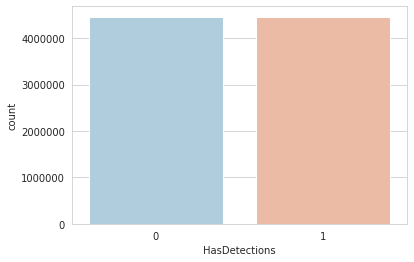

In [0]:
# Let's see how evenly train dataset's target variable is divided

sns.set_style('whitegrid')
sns.countplot(x='HasDetections',data=train,palette='RdBu_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe516a0fc50>,
      dtype=object)

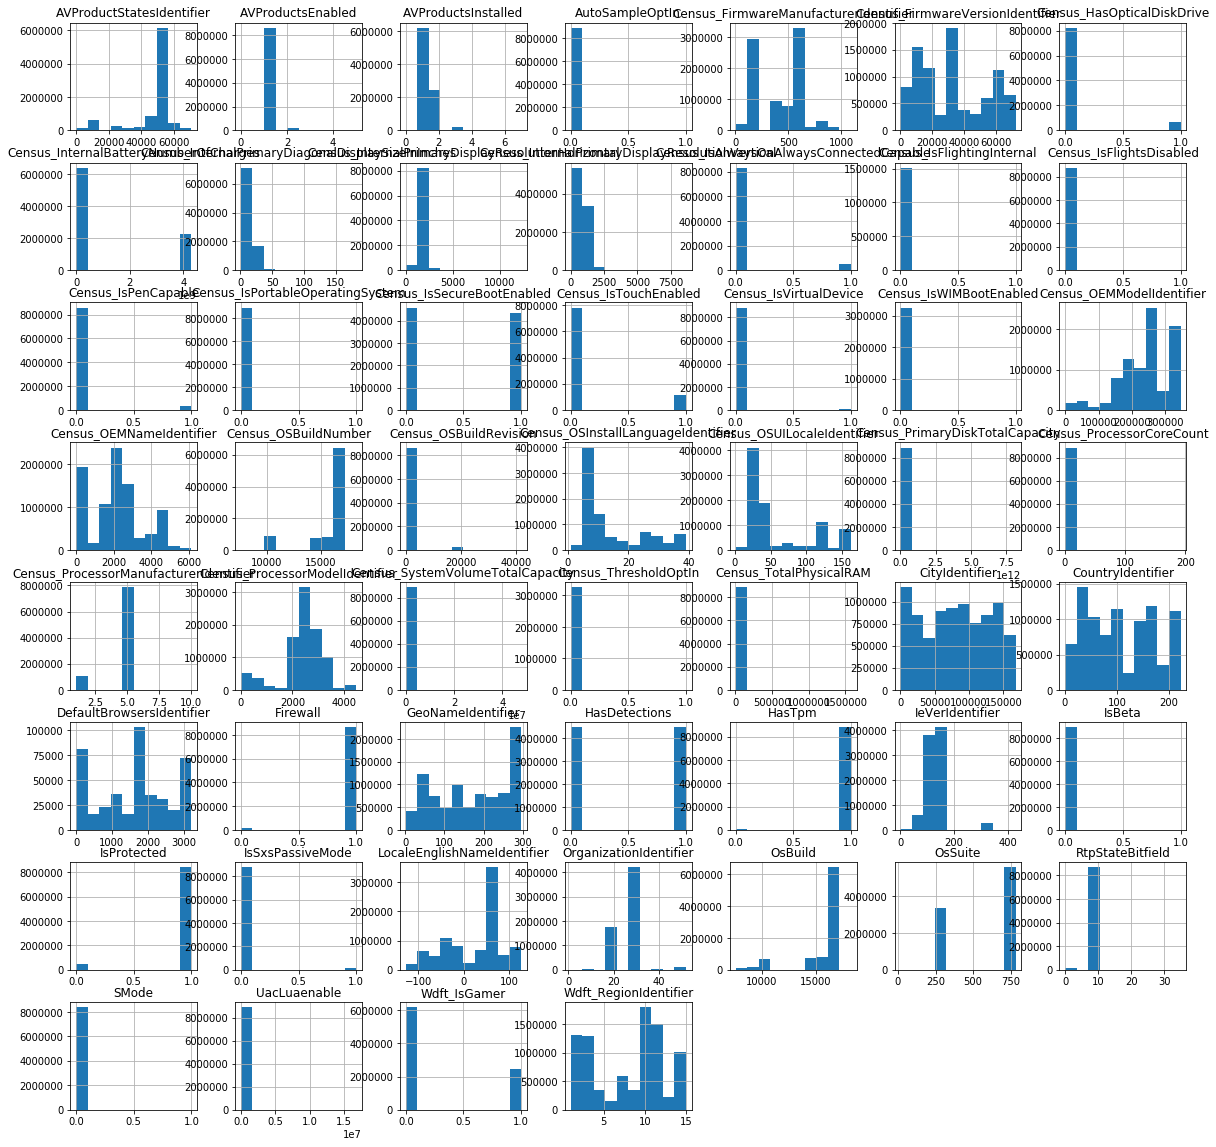

In [0]:
train_copy.hist(figsize=(20,20))

*Treating Missing values and zeros*

In [0]:
train.isnull().sum()

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488045
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                      36221
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

Total   Percent
PuaMode                     8919174  0.999741
Census_ProcessorClass       8884852  0.995894
DefaultBrowsersIdentifier   8488045  0.951416
Census_IsFlightingInternal  7408759  0.830440
Census_InternalBatteryType  6338429  0.710468

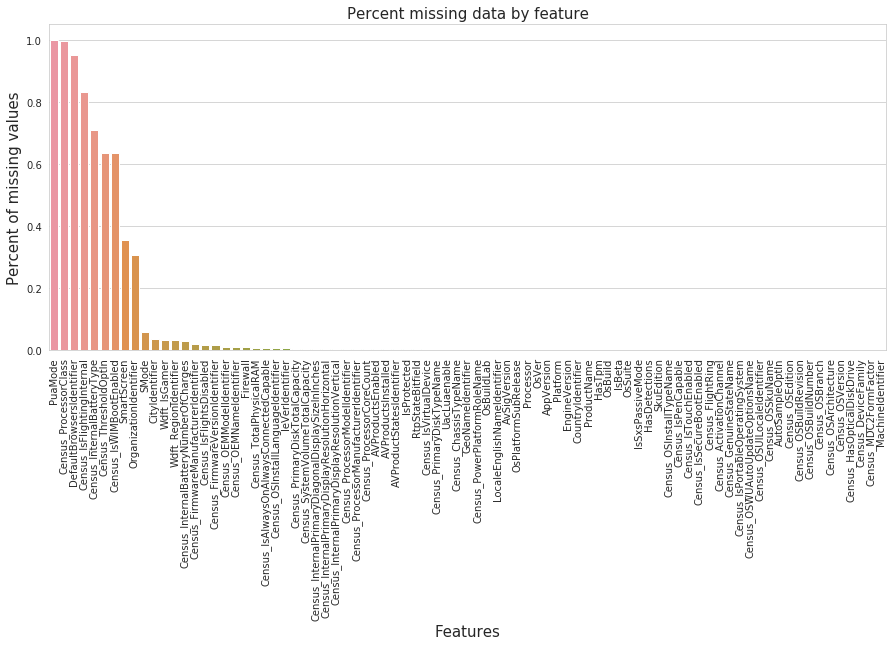

In [0]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [0]:
# Checking the count of zeros in each feature
print(train_copy[train_copy == 0].count(axis=0)/len(train_copy.index))

MachineIdentifier                                    0.000000e+00
ProductName                                          0.000000e+00
EngineVersion                                        0.000000e+00
AppVersion                                           0.000000e+00
AvSigVersion                                         0.000000e+00
IsBeta                                               9.999925e-01
RtpStateBitfield                                     2.137548e-02
IsSxsPassiveMode                                     9.826662e-01
AVProductStatesIdentifier                            0.000000e+00
AVProductsInstalled                                  1.120890e-07
AVProductsEnabled                                    2.909606e-03
HasTpm                                               1.202894e-02
CountryIdentifier                                    0.000000e+00
CityIdentifier                                       0.000000e+00
OrganizationIdentifier                               0.000000e+00
GeoNameIde

**IsBeta**
has 99.9% zeros, let's see why

In [0]:
train_copy['IsBeta'].value_counts()

0    8921416
1         67
Name: IsBeta, dtype: int64

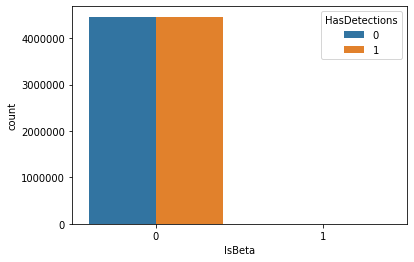

In [0]:
sns.countplot(x="IsBeta", hue="HasDetections", data=train_copy)

In [0]:
train_copy.groupby(['IsBeta','HasDetections']).size()
# It seems like data here is equally distributed.

IsBeta  HasDetections
0       0                4462557
        1                4458859
1       0                     34
        1                     33
dtype: int64

In [12]:
print('Pearson :',train_copy['IsBeta'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['IsBeta'].corr(train_copy['HasDetections'], method='spearman'))
# Correlation seems to be weak between IsBeta and target variable
# Might be considered to drop

Pearson : -3.976587855315659e-05 
Spearman : -3.976587855317073e-05


**RtpStateBitfield** has 32318 missing values and 2% zeros

In [0]:
train_copy['RtpStateBitfield'].value_counts()

7.0     8651487
0.0      190701
8.0       21974
5.0       20328
3.0        3029
1.0        1625
35.0         21
Name: RtpStateBitfield, dtype: int64

In [0]:
train_copy.groupby(['RtpStateBitfield','HasDetections']).size()

RtpStateBitfield  HasDetections
0.0               0                 119060
                  1                  71641
1.0               0                    976
                  1                    649
3.0               0                   2122
                  1                    907
5.0               0                  17259
                  1                   3069
7.0               0                4299964
                  1                4351523
8.0               0                   5548
                  1                  16426
35.0              0                      2
                  1                     19
dtype: int64

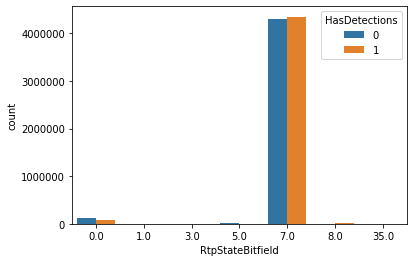

In [0]:
sns.countplot(x="RtpStateBitfield", hue="HasDetections", data=train_copy)

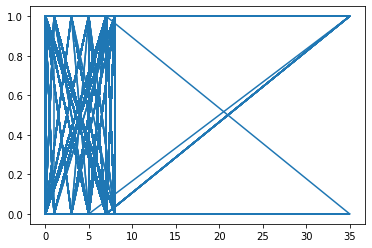

In [11]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(train_copy['RtpStateBitfield'],train_copy['HasDetections'])


In [12]:
# Let's see correlation of this feature with target variable before imputing
print('Pearson :',train_copy['RtpStateBitfield'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['RtpStateBitfield'].corr(train_copy['HasDetections'], method='spearman'))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Pearson : 0.04148565043499784 
Spearman : 0.05118494177788844


In [0]:
train_copy['RtpStateBitfield'].fillna(train_copy['RtpStateBitfield'].mode(), inplace=True)

In [24]:
# Let's see correlation of this feature with target variable after imputing
print('Pearson :',train_copy['RtpStateBitfield'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['RtpStateBitfield'].corr(train_copy['HasDetections'], method='spearman'))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Pearson : 0.04148565043499784 
Spearman : 0.05118494177788844


**IsSxsPassiveMode** has 98% zeros

Google searches suggest that this a active/passive mode of operation for Windows Defender. If another third party primary antivirus exists on the system, the Defender enters Passive mode. Passive mode obviously offers reduced functionality

In [0]:
train_copy['IsSxsPassiveMode'].value_counts()

0    8766840
1     154643
Name: IsSxsPassiveMode, dtype: int64

In [0]:
train_copy.groupby(['IsSxsPassiveMode','HasDetections']).size()

IsSxsPassiveMode  HasDetections
0                 0                4364823
                  1                4402017
1                 0                  97768
                  1                  56875
dtype: int64

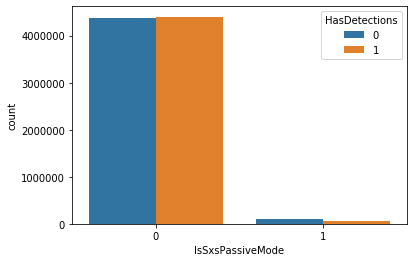

In [0]:
sns.countplot(x="IsSxsPassiveMode", hue="HasDetections", data=train_copy)

In [13]:
# correlation of this feature with target variable
print('Pearson :',train_copy['IsSxsPassiveMode'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['IsSxsPassiveMode'].corr(train_copy['HasDetections'], method='spearman'))
# Weak correlation

Pearson : -0.03506556619727219 
Spearman : -0.035065566197270304


**DefaultBrowsersIdentifier**

In [0]:
train_copy['DefaultBrowsersIdentifier'].value_counts()

239.0     46056
3196.0    42694
1632.0    28751
3176.0    24222
146.0     20756
1910.0    19416
1727.0    17393
2724.0    14538
2064.0    13993
1160.0    12594
1536.0    11306
788.0     11302
1623.0    10406
1078.0    10267
2168.0     7729
2272.0     7436
1823.0     7397
2290.0     6758
614.0      6539
2388.0     6371
773.0      5900
1622.0     5332
1161.0     4891
139.0      4246
1926.0     4098
1616.0     3696
2434.0     3491
2170.0     2903
597.0      2386
2182.0     2184
2726.0     2016
890.0      1989
2988.0     1900
1991.0     1858
1628.0     1826
2460.0     1752
508.0      1690
223.0      1522
1071.0     1511
1870.0     1490
1079.0     1459
311.0      1445
2188.0     1395
168.0      1288
1351.0     1164
1952.0      977
230.0       962
3000.0      925
351.0       771
1118.0      743
2372.0      727
1066.0      677
253.0       672
1909.0      657
2620.0      576
645.0       567
721.0       554
2422.0      545
430.0       516
339.0       508
1429.0      473
2420.0      465
1529.0  

In [0]:
train_copy.groupby(['DefaultBrowsersIdentifier','HasDetections']).size()

DefaultBrowsersIdentifier  HasDetections
1.0                        0                   19
                           1                   20
2.0                        0                    1
                           1                    2
3.0                        1                    2
5.0                        0                    1
6.0                        1                    1
7.0                        0                    1
                           1                    5
8.0                        0                    6
                           1                    7
9.0                        0                    9
                           1                   10
10.0                       0                  153
                           1                  102
11.0                       1                    1
14.0                       1                    1
15.0                       1                    1
16.0                       0                    1
         

In [0]:
# Correlations before imputing
print('Pearson :',train_copy['DefaultBrowsersIdentifier'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['DefaultBrowsersIdentifier'].corr(train_copy['HasDetections'], method='spearman'))

Pearson : -0.0020024934315022334 
Spearman : 0.002650600462445593


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [0]:
train_copy['DefaultBrowsersIdentifier'].fillna(train_copy['DefaultBrowsersIdentifier'].mode(), inplace=True)

In [15]:
# Correlations after imputing
print('Pearson :',train_copy['DefaultBrowsersIdentifier'].corr(train_copy['HasDetections']),'\nSpearman :',
      train_copy['DefaultBrowsersIdentifier'].corr(train_copy['HasDetections'], method='spearman'))

Pearson : -0.0019994893117761467 
Spearman : 0.0026533307696665976


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


**AVProductStatesIdentifier**

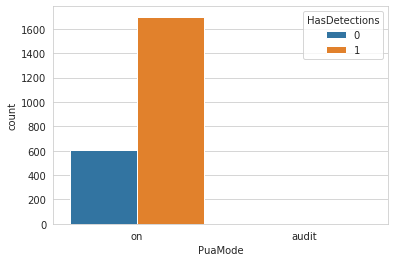

In [0]:
sns.countplot(x="PuaMode", hue="HasDetections", data=train)

# PuaMode has 2 Categories - on(2307 samples), audit(2 samples)
# I'm planning to drop PuaMode:
#   - 99.97% missing values
#   - As observed from below plot, albeit having PuaMode enabled, from majority of recorded samples it can be seen that systems are effected with malware.

In [0]:
# Dropping features with more than 60% missing values

train_copy = train_copy.drop(['PuaMode',
                   'Census_ProcessorClass',
                   'DefaultBrowsersIdentifier',
                   'Census_IsFlightingInternal',
                   'Census_InternalBatteryType',
                   'Census_ThresholdOptIn',
                   'Census_IsWIMBootEnabled'],axis=1)

**Data** **Distribution**

In [0]:
# Dropping features with more than 90% zeros
train_copy.drop(columns=train_copy.columns[((train_copy==0).mean()>0.9)],axis=1)
#Let's go through it step by step: the df==0 returns True \ False in each cell. 
#The .mean() method treats True as 1 and False as 0, so comparing that mean to 0.9 is what you want. 
#Calling df.columns[...] at these places will return only those where the >0.9 holds, and drop just drops them.

KeyboardInterrupt: ignored

In [0]:
(fill_mean = ['CityIdentifier',
             'CountryIdentifier',
             'GeoNameIdentifier',
             'Wdft_Regionidentifier',
             'Census_OEMModelIdentifier',
             'Census_OEMNameIdentifier',
             'Census_ProcessorModelIdentifier']
fill_median = ['Census_FirmwareVersionIdentifier',
               'AVProductsInstalled']
fill_mode = ['AVProductStatesIdentifier',
             'AVProductsEnabled',
             'Wdft_IsGamer',
             'UacLuaenable']

## Pandas profiling

## Test set

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

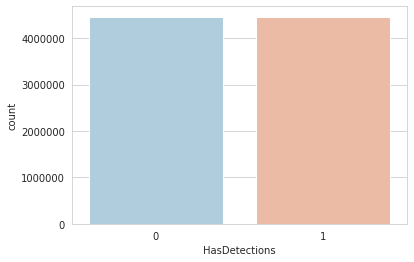

In [0]:
# Let's see how evenly test dataset's target variable is divided

sns.set_style('whitegrid')
sns.countplot(x='HasDetections',data=train,palette='RdBu_r')

In [0]:
# calculating the percentage of Na values column wise
(test.isna().mean().round(4) * 100).sort_values(ascending=False)

PuaMode                                              99.97
Census_ProcessorClass                                99.77
DefaultBrowsersIdentifier                            96.09
Census_IsFlightingInternal                           84.98
Census_InternalBatteryType                           76.14
SMode                                                74.25
Census_ThresholdOptIn                                70.41
Census_IsWIMBootEnabled                              70.32
SmartScreen                                          44.55
OrganizationIdentifier                               31.61
Wdft_IsGamer                                          3.86
Wdft_RegionIdentifier                                 3.86
Census_InternalBatteryNumberOfCharges                 3.05
Census_FirmwareManufacturerIdentifier                 2.53
CityIdentifier                                        2.44
Census_FirmwareVersionIdentifier                      2.26
Census_IsFlightsDisabled                              1.

In [0]:
# Dropping features with more than 60% missing values in train set

test = test.drop(['PuaMode',
                   'Census_ProcessorClass',
                   'DefaultBrowsersIdentifier',
                   'Census_IsFlightingInternal',
                   'Census_InternalBatteryType',
                   'Census_ThresholdOptIn',
                   'Census_IsWIMBootEnabled'],axis=1)

# Sampling the Large Dataset

In [0]:
sample_train = train.sample(frac=0.01)

In [0]:
sample_train.shape[0].compute()

89207

# Pandas Profiling

In [0]:
!pip install pandas-profiling

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

pp.ProfileReport(sample_train.compute())

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
import numpy as np
sample_train.var(axis=0)

IsBeta                                               1.120988e-05
RtpStateBitfield                                     1.058825e+00
IsSxsPassiveMode                                     1.705197e-02
AVProductStatesIdentifier                            1.975749e+08
AVProductsInstalled                                  2.722298e-01
AVProductsEnabled                                    2.884479e-02
HasTpm                                               1.204774e-02
CountryIdentifier                                    3.975517e+03
CityIdentifier                                       2.388798e+09
OrganizationIdentifier                               3.093564e+01
GeoNameIdentifier                                    7.981525e+03
LocaleEnglishNameIdentifier                          4.809049e+03
OsBuild                                              4.832422e+06
OsSuite                                              6.175773e+04
IsProtected                                          5.249417e-02
AutoSample

# Missing Values column wise(%)

In [0]:
#calculating the percentage of Na values column wise
(sample_train.isna().mean().compute().round(4) * 100).sort_values(ascending=False)

PuaMode                                              99.97
Census_ProcessorClass                                99.58
DefaultBrowsersIdentifier                            95.13
Census_IsFlightingInternal                           82.89
Census_InternalBatteryType                           71.09
Census_ThresholdOptIn                                63.54
Census_IsWIMBootEnabled                              63.43
SmartScreen                                          35.54
OrganizationIdentifier                               31.06
SMode                                                 6.04
CityIdentifier                                        3.60
Wdft_IsGamer                                          3.24
Wdft_RegionIdentifier                                 3.24
Census_InternalBatteryNumberOfCharges                 3.05
Census_FirmwareManufacturerIdentifier                 2.03
Census_IsFlightsDisabled                              1.85
Census_FirmwareVersionIdentifier                      1.

Total   Percent
PuaMode                     89184  0.999742
Census_ProcessorClass       88839  0.995875
DefaultBrowsersIdentifier   84748  0.950015
Census_IsFlightingInternal  74148  0.831190
Census_InternalBatteryType  63427  0.711009

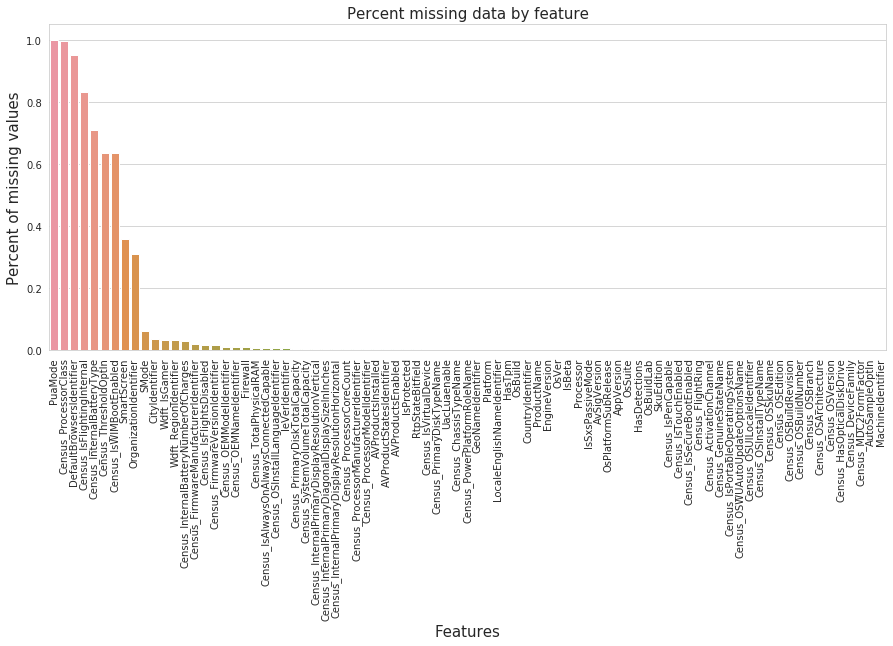

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total = sample_train.isnull().sum().compute().sort_values(ascending=False)
percent = (sample_train.isnull().sum()/sample_train.isnull().count()).compute().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [0]:
# Dropping features with more than 60% missing values

sample_train = sample_train.drop(['PuaMode',
                                  'Census_ProcessorClass',
                                  'DefaultBrowsersIdentifier',
                                  'Census_IsFlightingInternal',
                                  'Census_InternalBatteryType',
                                  'Census_ThresholdOptIn',
                                  'Census_IsWIMBootEnabled'],axis=1).compute()

In [0]:
sample_train = sample_train.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical'],axis = 1)

In [0]:
sample_train.shape

(89207, 73)

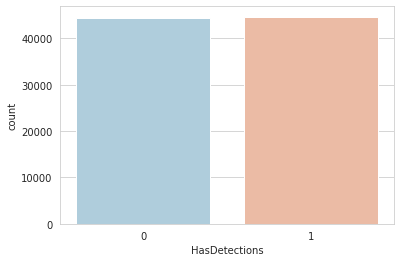

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='HasDetections',data=sample_train,palette='RdBu_r')

In [0]:
sample_train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
IsBeta                                       int64
RtpStateBitfield                           float64
IsSxsPassiveMode                             int64
AVProductStatesIdentifier                  float64
AVProductsInstalled                        float64
AVProductsEnabled                          float64
HasTpm                                       int64
CountryIdentifier                            int64
CityIdentifier                             float64
OrganizationIdentifier                     float64
GeoNameIdentifier                          float64
LocaleEnglishNameIdentifier                  int64
Platform                                    object
Processor                                   object
OsVer                          

In [0]:
sample_train.isna().sum()

MachineIdentifier                              0
ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
IsBeta                                         0
RtpStateBitfield                             334
IsSxsPassiveMode                               0
AVProductStatesIdentifier                    362
AVProductsInstalled                          362
AVProductsEnabled                            362
HasTpm                                         0
CountryIdentifier                              0
CityIdentifier                              3197
OrganizationIdentifier                     27602
GeoNameIdentifier                              1
LocaleEnglishNameIdentifier                    0
Platform                                       0
Processor                                      0
OsVer                                          0
OsBuild             

In [0]:
 sample_train['Wdft_RegionIdentifier'].value_counts()

10.0    21074
11.0    13358
3.0     13203
1.0     12194
15.0    10115
7.0      5992
8.0      2767
13.0     2258
5.0      2048
12.0     1652
6.0      1548
4.0      1331
9.0       853
2.0       783
14.0       31
Name: Wdft_RegionIdentifier, dtype: int64

In [0]:
sample_train['RtpStateBitfield'] = sample_train['RtpStateBitfield'].fillna(sample_train['RtpStateBitfield'].mode()[0])
sample_train['AVProductStatesIdentifier'] = sample_train['AVProductStatesIdentifier'].fillna(sample_train['AVProductStatesIdentifier'].mean())
sample_train['AVProductsInstalled'] = sample_train['AVProductsInstalled'].fillna(sample_train['AVProductsInstalled'].mode()[0])
sample_train['AVProductsEnabled'] = sample_train['AVProductsEnabled'].fillna(sample_train['AVProductsEnabled'].mode()[0])
sample_train['CityIdentifier'] = sample_train['CityIdentifier'].fillna(sample_train['CityIdentifier'].mean())
sample_train['OrganizationIdentifier'] = sample_train['OrganizationIdentifier'].fillna(sample_train['OrganizationIdentifier'].mode()[0])
sample_train['IsProtected'] = sample_train['IsProtected'].fillna(sample_train['IsProtected'].mode()[0])
sample_train['SMode'] = sample_train['SMode'].fillna(sample_train['SMode'].mode()[0])
sample_train['IeVerIdentifier'] = sample_train['IeVerIdentifier'].fillna(sample_train['IeVerIdentifier'].mean())
sample_train['SmartScreen'] = sample_train['SmartScreen'].fillna(sample_train['SmartScreen'].mode()[0])
sample_train['Firewall'] = sample_train['Firewall'].fillna(sample_train['Firewall'].mode()[0])
sample_train['UacLuaenable'] = sample_train['UacLuaenable'].fillna(sample_train['UacLuaenable'].mode()[0])
sample_train['Census_OEMModelIdentifier'] = sample_train['Census_OEMModelIdentifier'].fillna(sample_train['Census_OEMModelIdentifier'].mean())
sample_train['Census_ProcessorCoreCount'] = sample_train['Census_ProcessorCoreCount'].fillna(sample_train['Census_ProcessorCoreCount'].mean())
sample_train['Census_ProcessorManufacturerIdentifier'] = sample_train['Census_ProcessorManufacturerIdentifier'].fillna(sample_train['Census_ProcessorManufacturerIdentifier'].mode()[0])
sample_train['Census_ProcessorModelIdentifier'] = sample_train['Census_ProcessorModelIdentifier'].fillna(sample_train['Census_ProcessorModelIdentifier'].mean())
sample_train['Census_PrimaryDiskTotalCapacity'] = sample_train['Census_PrimaryDiskTotalCapacity'].fillna(sample_train['Census_PrimaryDiskTotalCapacity'].mean())
sample_train['Census_PrimaryDiskTypeName'] = sample_train['Census_PrimaryDiskTypeName'].fillna(sample_train['Census_PrimaryDiskTypeName'].mode()[0])
sample_train['Census_SystemVolumeTotalCapacity'] = sample_train['Census_SystemVolumeTotalCapacity'].fillna(sample_train['Census_SystemVolumeTotalCapacity'].mean())
sample_train['Census_TotalPhysicalRAM'] = sample_train['Census_TotalPhysicalRAM'].fillna(sample_train['Census_TotalPhysicalRAM'].mean())
sample_train['Census_ChassisTypeName'] = sample_train['Census_ChassisTypeName'].fillna(sample_train['Census_ChassisTypeName'].mode()[0])
sample_train['Census_InternalBatteryNumberOfCharges'] = sample_train['Census_InternalBatteryNumberOfCharges'].fillna(sample_train['Census_InternalBatteryNumberOfCharges'].mean())
sample_train['Census_OSInstallLanguageIdentifier'] = sample_train['Census_OSInstallLanguageIdentifier'].fillna(sample_train['Census_OSInstallLanguageIdentifier'].mode()[0])
sample_train['Census_IsFlightsDisabled'] = sample_train['Census_IsFlightsDisabled'].fillna(sample_train['Census_IsFlightsDisabled'].mode()[0])
sample_train['Census_FirmwareManufacturerIdentifier'] = sample_train['Census_FirmwareManufacturerIdentifier'].fillna(sample_train['Census_FirmwareManufacturerIdentifier'].mean())
sample_train['Census_FirmwareVersionIdentifier'] = sample_train['Census_FirmwareVersionIdentifier'].fillna(sample_train['Census_FirmwareVersionIdentifier'].mean())
sample_train['Census_IsVirtualDevice'] = sample_train['Census_IsVirtualDevice'].fillna(sample_train['Census_IsVirtualDevice'].mode()[0])
sample_train['Census_IsAlwaysOnAlwaysConnectedCapable'] = sample_train['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(sample_train['Census_IsAlwaysOnAlwaysConnectedCapable'].mode()[0])
sample_train['Wdft_IsGamer'] = sample_train['Wdft_IsGamer'].fillna(sample_train['Wdft_IsGamer'].mode()[0])
sample_train['Wdft_RegionIdentifier'] = sample_train['Wdft_RegionIdentifier'].fillna(sample_train['Wdft_RegionIdentifier'].mode()[0])
sample_train['Census_OEMNameIdentifier'] = sample_train['Census_OEMNameIdentifier'].fillna(sample_train['Census_OEMNameIdentifier'].mean())


In [0]:
sample_train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
IsBeta                                       int64
RtpStateBitfield                           float64
IsSxsPassiveMode                             int64
AVProductStatesIdentifier                  float64
AVProductsInstalled                        float64
AVProductsEnabled                          float64
HasTpm                                       int64
CountryIdentifier                            int64
CityIdentifier                             float64
OrganizationIdentifier                     float64
GeoNameIdentifier                          float64
LocaleEnglishNameIdentifier                  int64
Platform                                    object
Processor                                   object
OsVer                          

In [0]:
for col in sample_train.columns[0:]:
  print(col,':',len(sample_train[col].unique()), 'unique lables')

MachineIdentifier : 89207 unique lables
ProductName : 2 unique lables
EngineVersion : 44 unique lables
AppVersion : 76 unique lables
AvSigVersion : 3839 unique lables
IsBeta : 1 unique lables
RtpStateBitfield : 6 unique lables
IsSxsPassiveMode : 2 unique lables
AVProductStatesIdentifier : 1990 unique lables
AVProductsInstalled : 5 unique lables
AVProductsEnabled : 5 unique lables
HasTpm : 2 unique lables
CountryIdentifier : 221 unique lables
CityIdentifier : 14740 unique lables
OrganizationIdentifier : 34 unique lables
GeoNameIdentifier : 236 unique lables
LocaleEnglishNameIdentifier : 186 unique lables
Platform : 4 unique lables
Processor : 3 unique lables
OsVer : 9 unique lables
OsBuild : 38 unique lables
OsSuite : 8 unique lables
OsPlatformSubRelease : 9 unique lables
OsBuildLab : 353 unique lables
SkuEdition : 8 unique lables
IsProtected : 2 unique lables
AutoSampleOptIn : 2 unique lables
SMode : 2 unique lables
IeVerIdentifier : 138 unique lables
SmartScreen : 11 unique lables
Fir

In [0]:
#sample_train['OsBuildLab'].value_counts().compute()

In [0]:
# Frequency encoding for categorical features

'''sample_train.Wdft_RegionIdentifier = sample_train.Wdft_RegionIdentifier.map(sample_train.Wdft_RegionIdentifier.value_counts().to_dict())
sample_train.Census_ActivationChannel = sample_train.Census_ActivationChannel.map(sample_train.Census_ActivationChannel.value_counts().to_dict())
sample_train.Census_FlightRing = sample_train.Census_FlightRing.map(sample_train.Census_FlightRing.value_counts().to_dict())
sample_train.Census_GenuineStateName = sample_train.Census_GenuineStateName.map(sample_train.Census_GenuineStateName.value_counts().to_dict())
sample_train.Census_OSWUAutoUpdateOptionsName = sample_train.Census_OSWUAutoUpdateOptionsName.map(sample_train.Census_OSWUAutoUpdateOptionsName.value_counts().to_dict())
sample_train.Census_OSInstallTypeName = sample_train.Census_OSInstallTypeName.map(sample_train.Census_OSInstallTypeName.value_counts().to_dict())
sample_train.Census_OSBranch = sample_train.Census_OSBranch.map(sample_train.Census_OSBranch.value_counts().to_dict())
sample_train.Census_OSArchitecture = sample_train.Census_OSArchitecture.map(sample_train.Census_OSArchitecture.value_counts().to_dict())
sample_train.Census_PowerPlatformRoleName = sample_train.Census_PowerPlatformRoleName.map(sample_train.Census_PowerPlatformRoleName.value_counts().to_dict())
sample_train.Census_ChassisTypeName = sample_train.Census_ChassisTypeName.map(sample_train.Census_ChassisTypeName.value_counts().to_dict())
sample_train.Census_PrimaryDiskTypeName = sample_train.Census_PrimaryDiskTypeName.map(sample_train.Census_PrimaryDiskTypeName.value_counts().to_dict())
sample_train.Census_MDC2FormFactor = sample_train.Census_MDC2FormFactor.map(sample_train.Census_MDC2FormFactor.value_counts().to_dict())
sample_train.SmartScreen = sample_train.SmartScreen.map(sample_train.SmartScreen.value_counts().to_dict())
sample_train.SkuEdition = sample_train.SkuEdition.map(sample_train.SkuEdition.value_counts().to_dict())
sample_train.OsPlatformSubRelease = sample_train.OsPlatformSubRelease.map(sample_train.OsPlatformSubRelease.value_counts().to_dict())
sample_train.Processor = sample_train.Processor.map(sample_train.Processor.value_counts().to_dict())
sample_train.Platform = sample_train.Platform.map(sample_train.Platform.value_counts().to_dict())'''

sample_train.head()

MachineIdentifier   ProductName EngineVersion  \
45595   0151d24c3d5c207feeda85a3b9355be0  win8defender   1.1.15100.1   
116275  03589a752c526fb3f331d9102104f605  win8defender   1.1.15200.1   
23398   00ad2451362de783eb125d4f4261df78  win8defender   1.1.15100.1   
25915   00bfcaff727854a423fb26895bb6e136  win8defender   1.1.15100.1   
63079   01d192eb03e5b2e2c72a0a20dbf8f9a2  win8defender   1.1.15200.1   

             AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
45595      4.10.14393.0  1.273.1311.0       0               7.0   
116275  4.18.1807.18075  1.275.1115.0       0               7.0   
23398   4.18.1807.18075  1.273.1356.0       0               7.0   
25915   4.18.1807.18075  1.273.1667.0       0               7.0   
63079        4.10.209.0   1.275.149.0       0               0.0   

        IsSxsPassiveMode  AVProductStatesIdentifier  AVProductsInstalled  \
45595                  0                    46413.0                  2.0   
116275                 0                    43927.0                  2.0   
23398                  0                    53447.0                  1.0   
25915                  0                    53447.0                  1.0   
63079                  0                    59792.0                  1.0   

        AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
45595                 1.0       1                131        164218.0   
116275                1.0       1                 97         92673.0   
23398                 1.0       1                158        112284.0   
25915                 1.0       1                207         44785.0   
63079                 0.0       1                 60         86819.0   

        OrganizationIdentifier  GeoNameIdentifier  \
45595                     27.0              177.0   
116275                    27.0              126.0   
23398                     27.0              202.0   
25915                     27.0              277.0   
63079                     27.0              240.0   

        LocaleEnglishNameIdentifier  Platform  Processor     OsVer  OsBuild  \
45595                            75     86289      80994  10.0.0.0    14393   
116275                          124     86289      80994  10.0.0.0    17134   
23398                            70     86289      80994  10.0.0.0    17134   
25915                            75     86289      80994  10.0.0.0    16299   
63079                           233      1850      80994   6.3.0.0     9600   

        OsSuite  OsPlatformSubRelease  \
45595       768                  7291   
116275      768                 39122   
23398       256                 39122   
25915       256                 25075   
63079       768                  1850   

                                               OsBuildLab  SkuEdition  \
45595   14393.576.amd64fre.rs1_release_inmarket.161208...       54966   
116275           17134.1.amd64fre.rs4_release.180410-1804       54966   
23398            17134.1.amd64fre.rs4_release.180410-1804       32405   
25915   16299.431.amd64fre.rs3_release_svc_escrow.1805...       32405   
63079   9600.19101.amd64fre.winblue_ltsb_escrow.180718...       54966   

        IsProtected  AutoSampleOptIn  SMode  IeVerIdentifier  SmartScreen  \
45595           1.0                0    0.0             94.0        75016   
116275          1.0                0    0.0            137.0        75016   
23398           1.0                0    0.0            137.0        75016   
25915           1.0                0    0.0            117.0        75016   
63079           0.0                0    0.0            333.0        75016   

        Firewall  UacLuaenable  Census_MDC2FormFactor Census_DeviceFamily  \
45595        1.0           1.0                  57458     Windows.Desktop   
116275       1.0           1.0                  57458     Windows.Desktop   
23398        1.0           1.0                  57458     Windows.Desktop   
25915        1.0           1.0                

In [0]:
# Ordinal encoding or Label encoding 
!pip install category_encoders
import category_encoders as ce

# create an object of the OrdinalEncoding
ce_ordinal = ce.OrdinalEncoder(cols=['MachineIdentifier','ProductName','EngineVersion','AppVersion','RtpStateBitfield','AVProductStatesIdentifier','CountryIdentifier','CityIdentifier','OrganizationIdentifier','GeoNameIdentifier','LocaleEnglishNameIdentifier','Platform','Processor','AvSigVersion','OsVer','OsBuild','OsSuite','OsPlatformSubRelease','OsBuildLab','SkuEdition','IeVerIdentifier','SmartScreen','Census_MDC2FormFactor','Census_DeviceFamily','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier','Census_PrimaryDiskTotalCapacity','Census_PrimaryDiskTypeName','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_ChassisTypeName','Census_PowerPlatformRoleName','Census_InternalBatteryNumberOfCharges','Census_OSVersion','Census_OSArchitecture','Census_OSBranch','Census_OSBuildNumber','Census_OSBuildRevision','Census_OSInstallTypeName','Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName','Census_ActivationChannel','Census_FlightRing','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Wdft_RegionIdentifier','Census_DeviceFamily','Census_OSVersion','Census_OSEdition','Census_OSSkuName'])

     |████████████████████████████████| 102kB 2.2MB/s 


In [0]:
# fit and transform and you will get the encoded data
sample_train = ce_ordinal.fit_transform(sample_train)

In [0]:
sample_train.head()

MachineIdentifier  ProductName  EngineVersion  AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform  Processor  OsVer  OsBuild  OsSuite  OsPlatformSubRelease  OsBuildLab  SkuEdition  IsProtected  AutoSampleOptIn  SMode  IeVerIdentifier  SmartScreen  Firewall  UacLuaenable  Census_MDC2FormFactor  Census_DeviceFamily  Census_OEMNameIdentifier  Census_OEMModelIdentifier  Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  Census_ProcessorModelIdentifier  Census_PrimaryDiskTotalCapacity  Census_PrimaryDiskTypeName  Census_SystemVolumeTotalCapacity  Census_HasOpticalDiskDrive  Census_TotalPhysicalRAM  Census_ChassisTypeName  Census_PowerPlatformRoleName  Census_InternalBatteryNumberOfCharges  Census_OSVersion  Census_OSArchitecture  Census_OSBranch  \
110555                  1            1              1           1             1       1                 1                 0                          1                  2.0                1.0       1                  1               1                       1                  1                            1         1          1      1        1        1                     1           1           1          1.0                0    0.0                1            1       1.0           1.0                      1                    1                         1                          1                          1                                       1                                1                                1                           1                                 1                           0                        1                       1                             1                                      1                 1                      1                1   
20461                   2            1              2           2             2       1                 1                 0                          2                  1.0                1.0       1                  2               2                       1                  2                            2         1          2      1        2        1                     1           2           1          1.0                0    0.0                2            1       1.0           1.0                      1                    1                         2                          2                          2                                       2                                2                                2                           2                                 2                           0                        2                       1                             2                                      2                 2                      2                2   
98668                   3            1              2           2             3       1                 1                 0                          2                  1.0                1.0       1                  3               3                       2                  3                            3         1          1      1        3        2                     1           3           1          1.0                0    0.0                3            1       1.0           1.0                      1                    1                         3                          3                          2                                       2                                3                                3                           2                                 3                           0                        3                       1                             1                                      1                 3                      1                3   
130029                  4            1              2   

In [0]:
sample_X = sample_train.drop(['HasDetections'],axis=1)
sample_y = sample_train['HasDetections']

# **Feature Selection**


In [0]:
sample_X.describe()

MachineIdentifier   ProductName  ...  Wdft_IsGamer  Wdft_RegionIdentifier
count       89207.000000  89207.000000  ...  89207.000000           89207.000000
mean        44604.000000      1.010470  ...      0.275214               4.813468
std         25751.987069      0.101787  ...      0.446624               3.367934
min             1.000000      1.000000  ...      0.000000               1.000000
25%         22302.500000      1.000000  ...      0.000000               2.000000
50%         44604.000000      1.000000  ...      0.000000               5.000000
75%         66905.500000      1.000000  ...      1.000000               6.000000
max         89207.000000      2.000000  ...      1.000000              15.000000

[8 rows x 72 columns]

# Univariate Selection
*   Statistical tests can be used to select those features that have the 
strongest relationship with the output variable.
*   The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* The example below uses the chi-squared (chi²) statistical test for non-negative features to select the best features

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(sample_X,sample_y)

ValueError: ignored

In [0]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(sample_X.columns)

In [0]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

Specs          Score
0                         MachineIdentifier    9846.620703
1                               ProductName       0.027770
2                             EngineVersion    2919.053458
3                                AppVersion    1890.571095
4                              AvSigVersion  327959.147190
5                                    IsBeta       0.000000
6                          RtpStateBitfield       7.313029
7                          IsSxsPassiveMode      90.921357
8                 AVProductStatesIdentifier  351550.100229
9                       AVProductsInstalled     395.282557
10                        AVProductsEnabled       2.734659
11                                   HasTpm       0.057741
12                        CountryIdentifier     262.522633
13                           CityIdentifier    7078.042229
14                   OrganizationIdentifier       0.207665
15                        GeoNameIdentifier     139.298068
16              LocaleEnglishNameIdentifier     109.450575
17                                 Platform       0.000806
18                                Processor      32.271154
19                                    OsVer       0.210254
20                                  OsBuild     100.059287
21                                  OsSuite       6.427553
22                     OsPlatformSubRelease       0.000000
23                               OsBuildLab    7167.343732
24                               SkuEdition       0.000000
25                              IsProtected      15.250372
26                          AutoSampleOptIn       1.004336
27                                    SMode       8.602746
28                          IeVerIdentifier     999.881754
29                              SmartScreen       0.000000
30                                 Firewall       0.007208
31                             UacLuaenable       0.081440
32                    Census_MDC2FormFactor       0.000000
33                      Census_DeviceFamily       0.021979
34                 Census_OEMNameIdentifier   15036.950103
35                Census_OEMModelIdentifier  192562.774174
36                Census_ProcessorCoreCount     148.909605
37   Census_ProcessorManufacturerIdentifier       0.506054
38          Census_ProcessorModelIdentifier   19143.470676
39          Census_PrimaryDiskTotalCapacity    9050.103881
40               Census_PrimaryDiskTypeName      23.115203
41         Census_SystemVolumeTotalCapacity  170631.229845
42               Census_HasOpticalDiskDrive      50.179025
43                  Census_TotalPhysicalRAM     229.495196
44                   Census_ChassisTypeName     509.986885
45             Census_PowerPlatformRoleName       7.445792
46    Census_InternalBatteryNumberOfCharges    6976.437317
47                         Census_OSVersion    3794.852656
48                    Census_OSArchitecture      31.800309
49                          Census_OSBranch      89.595820
50                     Census_OSBuildNumber     130.746935
51                   Census_OSBuildRevision    3769.737078
52                         Census_OSEdition       1.515001
53                         Census_OSSkuName       1.487666
54                 Census_OSInstallTypeName     123.592329
55       Census_OSInstallLanguageIdentifier      91.867881
56              Census_OSUILocaleIdentifier      85.106345
57         Census_OSWUAutoUpdateOptionsName       9.694903
58         Census_IsPortableOperatingSystem       0.724266
59                  Census_GenuineStateName       0.619668
60                 Census_ActivationChannel      38.304237
61                 Census_IsFlightsDisabled       2.008673
62                        Census_FlightRing       0.006298
63    Census_FirmwareManufacturerIdentifier     715.655616
64         Census_FirmwareVersionIdentifier   28889.252072
65               Census_IsSecureBootEnabled       0.358756
66                   Census_IsVirtualDevice     225.594231
67                    Cens

In [0]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                    Specs          Score
8               AVProductStatesIdentifier  351550.100229
4                            AvSigVersion  327959.147190
35              Census_OEMModelIdentifier  192562.774174
41       Census_SystemVolumeTotalCapacity  170631.229845
64       Census_FirmwareVersionIdentifier   28889.252072
38        Census_ProcessorModelIdentifier   19143.470676
34               Census_OEMNameIdentifier   15036.950103
0                       MachineIdentifier    9846.620703
39        Census_PrimaryDiskTotalCapacity    9050.103881
23                             OsBuildLab    7167.343732
13                         CityIdentifier    7078.042229
46  Census_InternalBatteryNumberOfCharges    6976.437317
47                       Census_OSVersion    3794.852656
51                 Census_OSBuildRevision    3769.737078
2                           EngineVersion    2919.053458
3                              AppVersion    1890.571095
28                        IeVer

# Feature Importance
* You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
* Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(sample_X,sample_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[3.31461614e-02 4.04842082e-04 2.64613292e-02 2.36152799e-02
 3.57865188e-02 0.00000000e+00 2.76231705e-03 1.47803799e-03
 1.33546724e-02 2.37872498e-02 2.81733192e-03 9.63108268e-04
 3.01478095e-02 3.25350653e-02 1.95154898e-02 2.75583871e-02
 2.71484266e-02 1.41966581e-03 3.60464494e-03 1.23382624e-03
 1.37317732e-02 8.96623511e-03 0.00000000e+00 1.60328245e-02
 0.00000000e+00 3.35832371e-03 0.00000000e+00 2.05978642e-04
 1.70473342e-02 0.00000000e+00 4.20716026e-03 1.50890684e-03
 0.00000000e+00 1.08290413e-04 2.67187738e-02 3.09849496e-02
 1.99628867e-02 7.98539661e-03 3.12702883e-02 2.70426980e-02
 1.57497623e-02 3.26569243e-02 6.63574396e-03 2.55065281e-02
 1.82100936e-02 1.27646375e-02 1.96329764e-02 2.63270241e-02
 1.78790805e-03 1.48340565e-02 1.33327114e-02 2.60763176e-02
 1.43892757e-02 1.36195826e-02 2.52092310e-02 2.55789689e-02
 2.46775007e-02 1.86480480e-02 1.91434255e-04 8.31570664e-03
 1.57431847e-02 6.27676817e-06 6.85482638e-03 2.57096041e-02
 3.14474645e-02 9.881879

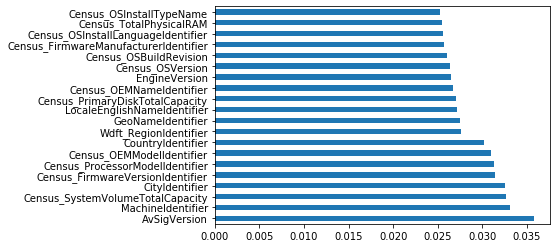

In [0]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=sample_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

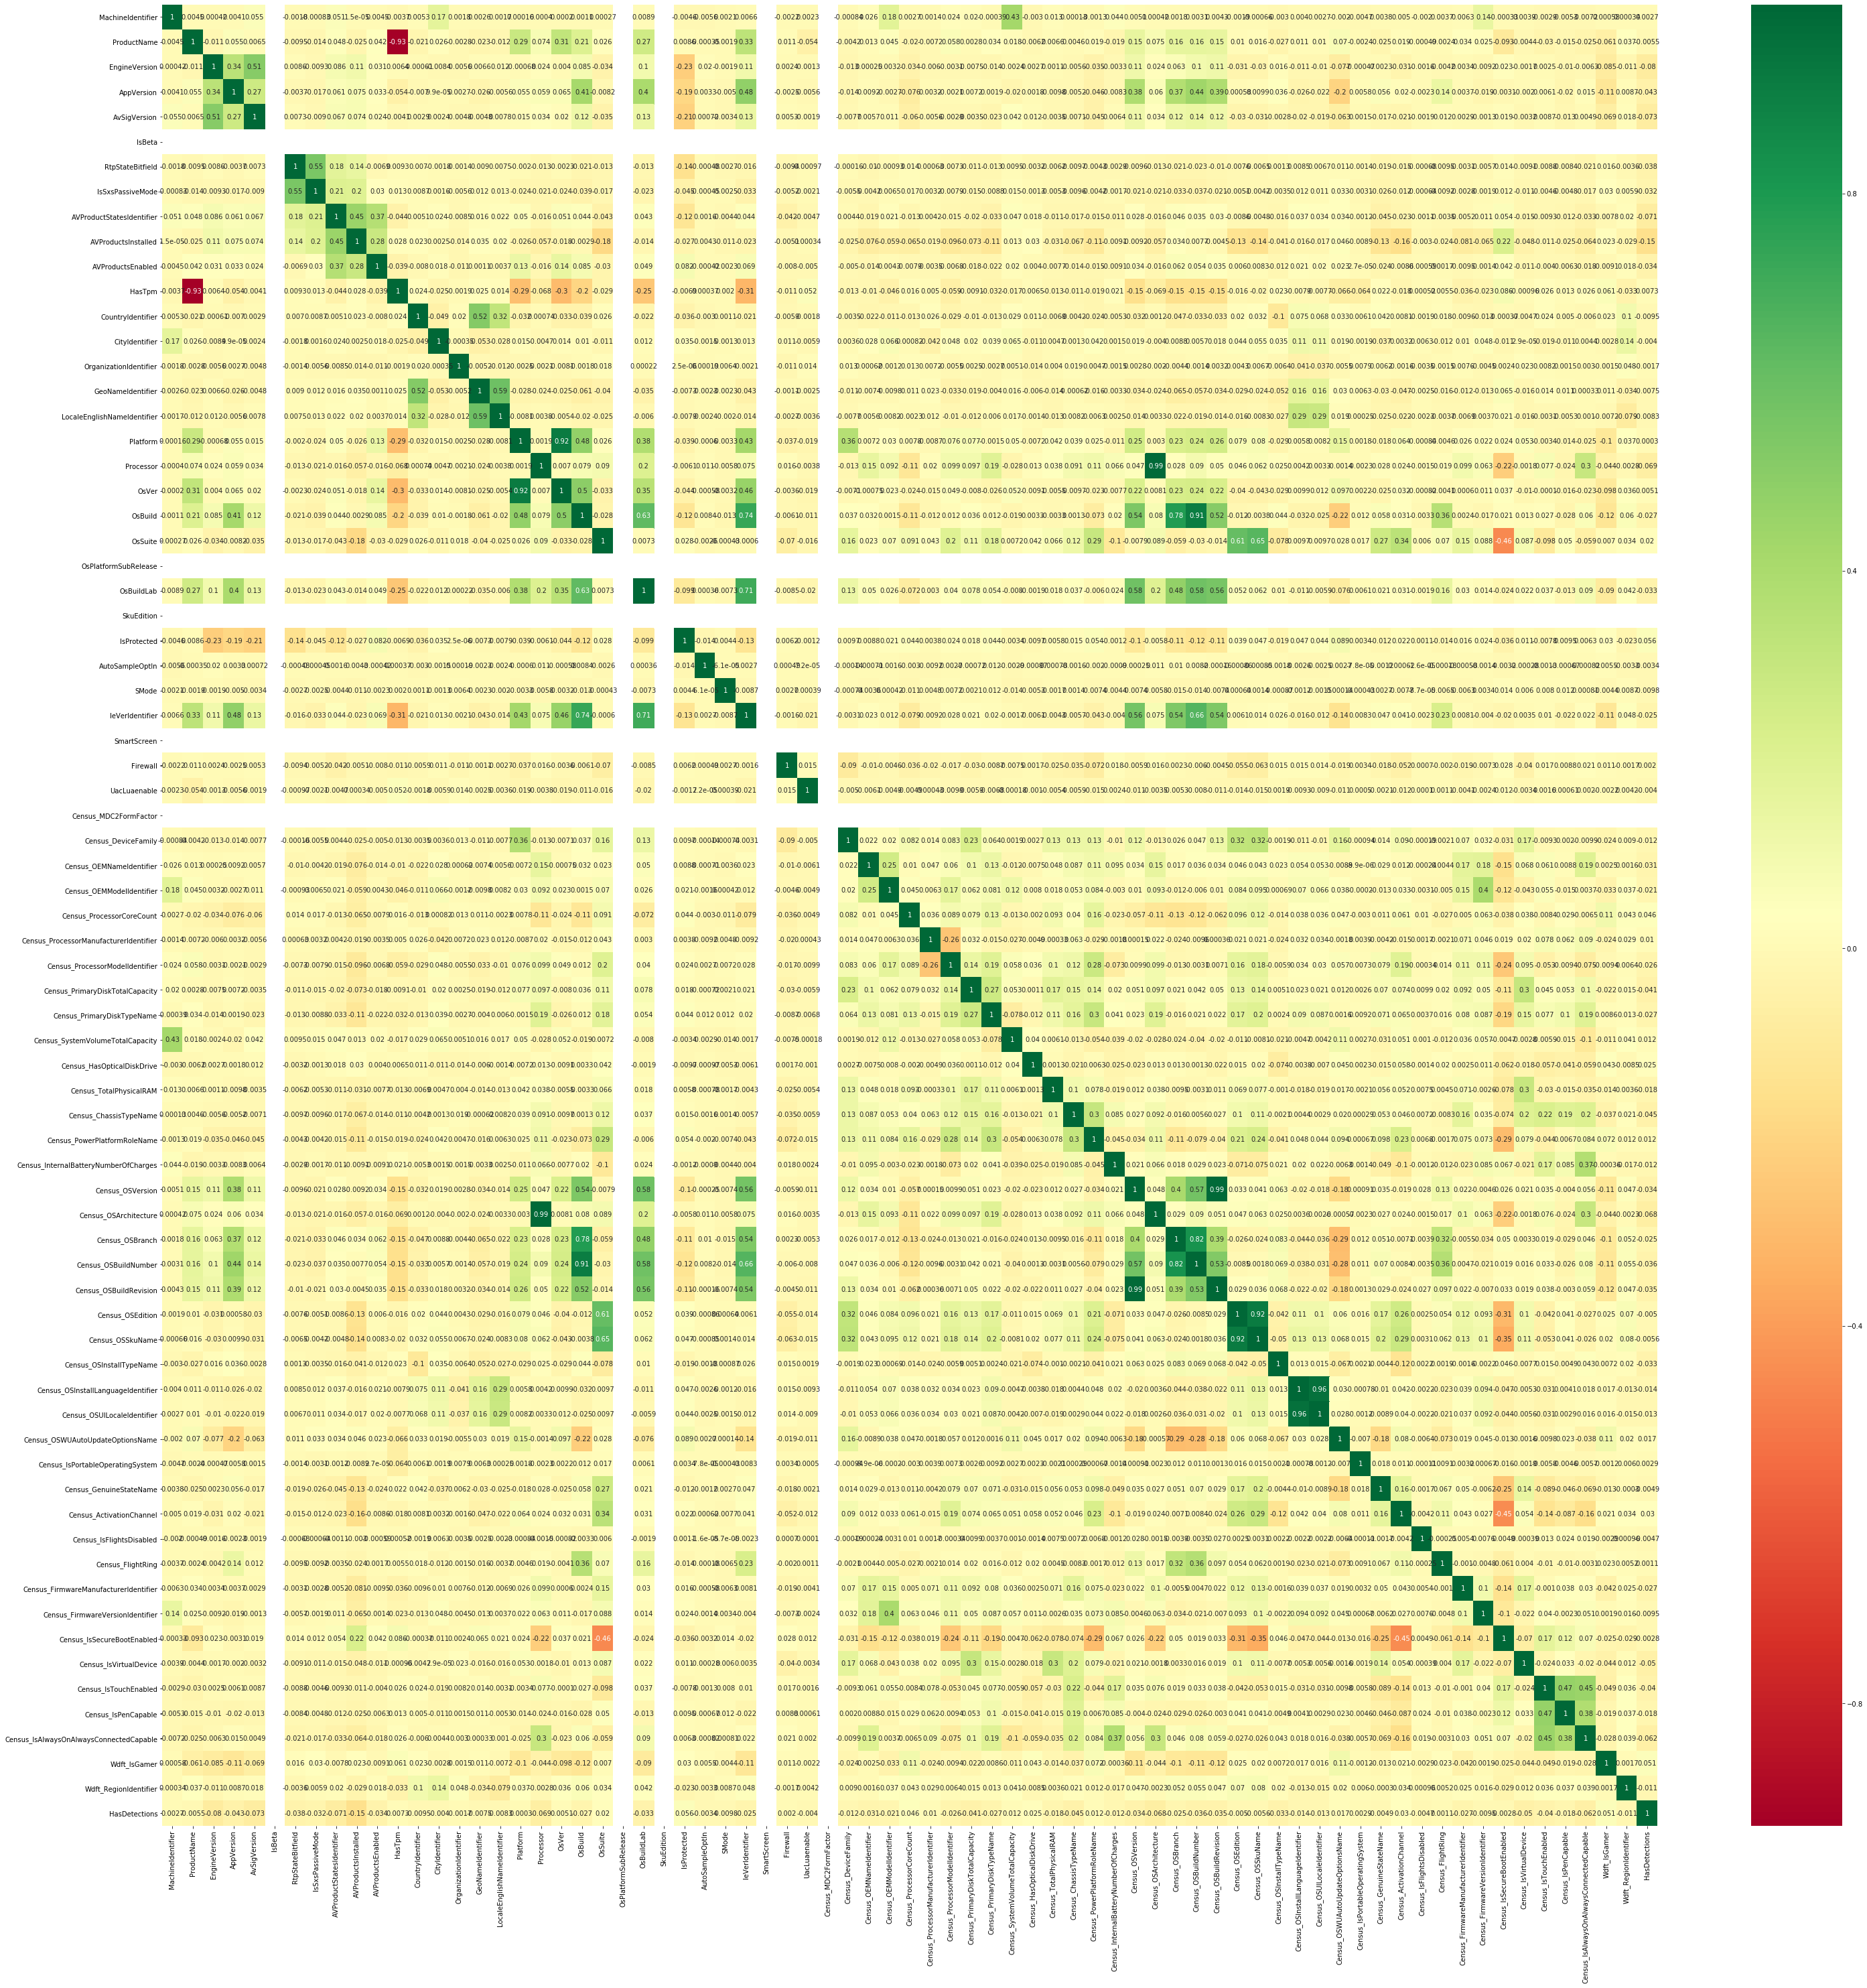

In [0]:
import seaborn as sns
#get correlations of each features in dataset

corrmat = sample_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map

g=sns.heatmap(sample_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
top_sample_X = sample_X['AvSigVersion','MachineIdentifier','AVProductStatesIdentifier','Census_OEMModelIdentifier','Census_SystemVolumeTotalCapacity','Census_FirmwareVersionIdentifier','Census_ProcessorModelIdentifier','Census_OEMNameIdentifier','Census_PrimaryDiskTotalCapacity','OsBuildLab']
top_sample_X.head()

In [0]:
top_sample_X.append(['AvSigVersion','MachineIdentifier','AVProductStatesIdentifier','Census_OEMModelIdentifier','Census_SystemVolumeTotalCapacity','Census_FirmwareVersionIdentifier','Census_ProcessorModelIdentifier','Census_OEMNameIdentifier','Census_PrimaryDiskTotalCapacity','OsBuildLab'])

TypeError: ignored

In [0]:
top_sample_X = top_sample_X.drop(['ProductName','EngineVersion','AppVersion','IsBeta','RtpStateBitfield','IsSxsPassiveMode','AVProductsInstalled','AVProductsEnabled','HasTpm','CountryIdentifier','CityIdentifier','OrganizationIdentifier','GeoNameIdentifier','LocaleEnglishNameIdentifier','Platform','Processor','OsVer','OsBuild','OsSuite','OsPlatformSubRelease','SkuEdition','IsProtected','AutoSampleOptIn','SMode','IeVerIdentifier','SmartScreen','Firewall','UacLuaenable','Census_MDC2FormFactor','Census_DeviceFamily','Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier','Census_PrimaryDiskTypeName','Census_HasOpticalDiskDrive','Census_TotalPhysicalRAM','Census_ChassisTypeName','Census_PowerPlatformRoleName','Census_InternalBatteryNumberOfCharges','Census_OSVersion','Census_OSArchitecture','Census_OSBranch','Census_OSBuildNumber','Census_OSBuildRevision','Census_OSEdition','Census_OSSkuName','Census_OSInstallTypeName','Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier','Census_OSWUAutoUpdateOptionsName','Census_IsPortableOperatingSystem','Census_GenuineStateName','Census_ActivationChannel','Census_IsFlightsDisabled','Census_FlightRing','Census_FirmwareManufacturerIdentifier','Census_IsSecureBootEnabled','Census_IsVirtualDevice','Census_IsTouchEnabled','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer','Wdft_RegionIdentifier'],axis=1)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(top_sample_X,sample_y,test_size=0.3, shuffle=True)

In [0]:
classifiers = []

model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = LogisticRegression()
classifiers.append(model5)

In [0]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    #cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.5912640585883496


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is 0.4957217053394612
Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') is 0.5216903934536486


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is 0.5405223629637933
